# Capstone Project for IBM

**Abhijith Rajan**

# Introduction

The main purpose of this projec is to analyze the existing theatres in and around the neighborhoods of Chennai. This analysis is required in order to identify a new place to consider for building a new theatre. Chennai is one of the major cities in the Southern part of India and it is filled i=with emotions on Cinema. Thus a new theatre will always be welcomed in the part. But inorder to make people travel less or if hey want to enjoy cinema very near to them, we would have to bring theaters closer to the people.

# Data Description

Data for this project is acquired from various sources and through various concepts. leease find the detailed analysis below.

1. We would have to know the knowledge of the neighborhoods in Chennai. I scraped the following data from the below Wikipedia page **https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai**

2. Once we know the neighborhoods, we would have to get the location coordinates for the same. This can be obtained by Geocoder or other such APIs. For this particular project I used GeoCoder.

3. Then using FourSquare API, I obtained the venues from each of the neighborhood to analyse the data. The below steps will explain on how I arrived at the data.

### Acquring the neighborhood information of Chennai

#### The data of neighborhood of Chennai is available in the below link. We would use webscrape the information and then filter out the required details

**Install the beautifulsoap and request package required for the webscraping

In [5]:
#pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install requests
#pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


**Import the necessary packages**

In [1]:
import pandas as pd
import numpy as np
import requests
import folium
import matplotlib as plt
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Filtering out the required data**

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai'
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')
#print(soup.prettify())

boroughs_ele = soup.find_all('span', class_= "mw-headline")
boroughs_ele

[<span class="mw-headline" id="North_Chennai">North Chennai</span>,
 <span class="mw-headline" id="West_Chennai">West Chennai</span>,
 <span class="mw-headline" id="South_and_East_Chennai">South and East Chennai</span>,
 <span class="mw-headline" id="Suburban_Chennai">Suburban Chennai</span>,
 <span class="mw-headline" id="Northern_Suburbs_of_Chennai">Northern Suburbs of Chennai</span>,
 <span class="mw-headline" id="Western_Suburbs_of_Chennai">Western Suburbs of Chennai</span>,
 <span class="mw-headline" id="Southern-western_Suburbs_of_Chennai">Southern-western Suburbs of Chennai</span>,
 <span class="mw-headline" id="Suburbs_along_ECR_and_OMR_of_Chennai">Suburbs along ECR and OMR of Chennai</span>,
 <span class="mw-headline" id="Satellite_Towns">Satellite Towns</span>,
 <span class="mw-headline" id="Important_Roads_of_Chennai">Important Roads of Chennai</span>,
 <span class="mw-headline" id="References">References</span>]

**We are only taking details of the neighborhood, and we are not considering the suburbs. So only consider boroughs as the first three elements**

In [3]:
boroughs = [ ele.get_text() for ele in boroughs_ele[0:3]]
boroughs

['North Chennai', 'West Chennai', 'South and East Chennai']

**We have to get neighbourhoods in each borough. We will get them using the below code and convert them to data frame**

In [4]:
ul_ele = soup.find_all('ul')[1:4]
neigh_list =[] 
for i in range(0,3):
    borough = boroughs[i]
    for anchor in ul_ele[i].find_all('a'):
        neigh_list.append([borough, anchor.get_text()])        
neigh_list
neigh_df = pd.DataFrame(neigh_list, columns = ['Borough','Neighborhood'])
neigh_df

,Borough,Neighborhood
0,North Chennai,Red Hills
1,North Chennai,Royapuram
2,North Chennai,Korukkupet
3,North Chennai,Vyasarpadi
4,North Chennai,Tondiarpet
...,...,...
136,South and East Chennai,Palavakkam
137,South and East Chennai,Varadharajapuram
138,South and East Chennai,Medavakkam
139,South and East Chennai,West Mambalam


**We will have to get the latitude longitude coordinates of the data. We will use the geocoder for the same. One such example is given below**

In [ ]:
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('Chennai')
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

**I have prepared the dataset in a  seperate csv built by the same method as above, as the value to get latitude,longitude takes a lot of time**

In [5]:
chennai_df = pd.read_csv('C:/Users/prath/Downloads/Chennai_Neighborhood.csv')
chennai_df

,Borough,Neighborhood,Latitude,Longitude
0,North,Red Hills,13.10862,80.20615
1,North,Royapuram,13.10728,80.29295
2,North,Korukkupet,13.11805,80.27774
3,North,Vyasarpadi,13.11911,80.25750
4,North,Tondiarpet,13.13145,80.27997
...,...,...,...,...
95,South & East,Kolappakkam,13.07209,80.20186
96,South & East,Mambakkam,12.90110,80.18384
97,South & East,Palavakkam,12.95832,80.25608
98,South & East,Varadharajapuram,13.04658,80.07157


**Now we can explore them in the map to see if the Neighborhoods are split in and around Chennai**

In [6]:
chn_latitude = chennai_df['Latitude'].mean()
chn_longitude = chennai_df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",chn_latitude,chn_longitude)

Latitude and Longitude of Bangalore are :  13.064129700000002 80.20483400000002


In [7]:
boroughs = chennai_df['Borough'].unique().tolist()
borough_colors ={}
for i in boroughs:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [25]:
borough_colors

{'North': '#80F7D4', 'West': '#C3283F', 'South & East': '#DB5868'}

In [41]:
chennai_map = folium.Map(location=[chn_latitude,chn_longitude],zoom_start=12,control_scale=True)

for lat,lng,boro,nei in zip(chennai_df['Latitude'],
                           chennai_df['Longitude'],
                           chennai_df['Borough'],
                           chennai_df['Neighborhood']):
    #print(boro)
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(chennai_map)

In [42]:
chennai_map

### Exploring Chennai Neighborhood using FourSquare API

**Populate the credentials needed for the Foursquare API**

In [9]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180606'
LIMIT = 150

**Define Function to obtain the total Number of Venues**

In [10]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

**Fetching values for the neighborhood**

In [13]:
chennai_venues = getNearbyVenues(names=chennai_df['Neighborhood'],
                                 boro = chennai_df['Borough'],
                                latitudes=chennai_df['Latitude'],
                                longitudes=chennai_df['Longitude'])

Fetching venues for :  Red Hills
Fetching venues for :  Royapuram
Fetching venues for :  Korukkupet
Fetching venues for :  Vyasarpadi
Fetching venues for :  Tondiarpet
Fetching venues for :  Tiruvottiyur
Fetching venues for :  Ennore
Fetching venues for :  Minjur
Fetching venues for :  Old Washermenpet
Fetching venues for :  Madhavaram
Fetching venues for :  Manali New Town
Fetching venues for :  Naravarikuppam
Fetching venues for :  Sowcarpet
Fetching venues for :  Puzhal
Fetching venues for :  Moolakadai
Fetching venues for :  Central
Fetching venues for :  Kolathur
Fetching venues for :  Parry's Corner
Fetching venues for :  Purasawalkam
Fetching venues for :  Perambur
Fetching venues for :  Manali
Fetching venues for :  Vallalar Nagar
Fetching venues for :  Mannadi
Fetching venues for :  George Town
Fetching venues for :  Basin Bridge
Fetching venues for :  Park Town
Fetching venues for :  Choolai
Fetching venues for :  Veppery
Fetching venues for :  Pulinanthope
Fetching venues fo

## Methodolody

The methodology that we used for this project is first examining if the total number of venues has any impact on the number of theaters in the locality. This is done because if we have very little information of a particular area, it might also affect the theatre count. After this analysis we analyse the count of movie theatre for each of the borough. This is to check if theaters are concentrated in a single borough or are they spread over a wide variety of the area/boroughs. The data is then fed to a k-means clustering algorithm so that the areas are clustered among themselves. The k-means clustering algorithm result is also compared with the Exploratory Data Analysis to check if they are consistent.

In [14]:
print("Total number of venues found in Chennai are : ",chennai_venues.shape[0])

Total number of venues found in Chennai are :  1514


In [15]:
chennai_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Red Hills,North,13.10862,80.20615,Villivakkam Bus Terminus,13.106705,80.205646,Bus Station
1,Red Hills,North,13.10862,80.20615,Kanchi Bakery,13.105286,80.207885,Bakery
2,Red Hills,North,13.10862,80.20615,Villivakkam Railway Station,13.110398,80.209552,Train Station
3,Red Hills,North,13.10862,80.20615,Vasanta Bhavan,13.104902,80.209002,Indian Restaurant
4,Red Hills,North,13.10862,80.20615,Screen 5 @ AGS,13.104802,80.208888,Multiplex


In [16]:
print("Total number of unique categories in chennai are : ",len(chennai_venues['Venue Category'].unique()))

Total number of unique categories in chennai are :  164


In [17]:
chennai_movie_venues= chennai_venues[chennai_venues['Venue Category'].str.contains("Movie|movie|Theater|Multiplex")]
chennai_movie_venues

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Red Hills,North,13.10862,80.20615,Screen 5 @ AGS,13.104802,80.208888,Multiplex
26,Tiruvottiyur,North,13.16351,80.30318,MSM Theatre,13.158902,80.299283,Indie Movie Theater
41,Minjur,North,13.07209,80.20186,Rohini Movie Park,13.075298,80.196165,Multiplex
43,Minjur,North,13.07209,80.20186,Rohini Silver Screens,13.075426,80.195743,Movie Theater
60,Madhavaram,North,13.07209,80.20186,Rohini Movie Park,13.075298,80.196165,Multiplex
...,...,...,...,...,...,...,...,...
1447,Peerkankaranai,South & East,13.07209,80.20186,Rohini Movie Park,13.075298,80.196165,Multiplex
1449,Peerkankaranai,South & East,13.07209,80.20186,Rohini Silver Screens,13.075426,80.195743,Movie Theater
1472,Kolappakkam,South & East,13.07209,80.20186,Rohini Movie Park,13.075298,80.196165,Multiplex
1474,Kolappakkam,South & East,13.07209,80.20186,Rohini Silver Screens,13.075426,80.195743,Movie Theater


In [18]:
chennai_movie_venues['Borough'].value_counts()

South & East    39
West            20
North           15
Name: Borough, dtype: int64

**From the above data we can observe that North neighbourhood of Chennai has a faily low share of thetres compared to the West and South & east zone.
So we may for now assume that that would be a right choice for a movie theatre. But lets further continue our analysis.**

## Comparing total number of venues with total number of cinema/movie theatre, as we may get a complete picture for the same

In [19]:
individual_chennai_venue_count = chennai_venues.groupby(['Neighborhood'])['Borough'].count().to_frame(name = 'Total Venue')
individual_chennai_venue_count
new_df =  chennai_df.join(individual_chennai_venue_count,on = 'Neighborhood', how = 'outer')
new_df[ new_df['Total Venue'].isna() ]

,Borough,Neighborhood,Latitude,Longitude,Total Venue
13,North,Puzhal,13.17473,80.21894,NaN


**As per the above analysis we can also see that for the above neighborhood we were not able to get any venues. This might be due to unavailability of data in the neighborhood. So we will have to check for any other source in the next iteration to confirm the same**

In [20]:
individual_chennai_movie_count = chennai_movie_venues.groupby(['Neighborhood'])['Borough'].count().to_frame(name = 'Total Movie Venue')
final_df =  new_df.join(individual_chennai_movie_count,on = 'Neighborhood', how = 'outer')
final_df

,Borough,Neighborhood,Latitude,Longitude,Total Venue,Total Movie Venue
0,North,Red Hills,13.10862,80.20615,8.0,1.0
1,North,Royapuram,13.10728,80.29295,4.0,NaN
2,North,Korukkupet,13.11805,80.27774,4.0,NaN
3,North,Vyasarpadi,13.11911,80.25750,4.0,NaN
4,North,Tondiarpet,13.13145,80.27997,3.0,NaN
...,...,...,...,...,...,...
95,South & East,Kolappakkam,13.07209,80.20186,15.0,2.0
96,South & East,Mambakkam,12.90110,80.18384,3.0,NaN
97,South & East,Palavakkam,12.95832,80.25608,15.0,1.0
98,South & East,Varadharajapuram,13.04658,80.07157,7.0,NaN


**We are replacing all the NaN with 0, to plot the graphs**

In [21]:
final_df.fillna(0)

,Borough,Neighborhood,Latitude,Longitude,Total Venue,Total Movie Venue
0,North,Red Hills,13.10862,80.20615,8.0,1.0
1,North,Royapuram,13.10728,80.29295,4.0,0.0
2,North,Korukkupet,13.11805,80.27774,4.0,0.0
3,North,Vyasarpadi,13.11911,80.25750,4.0,0.0
4,North,Tondiarpet,13.13145,80.27997,3.0,0.0
...,...,...,...,...,...,...
95,South & East,Kolappakkam,13.07209,80.20186,15.0,2.0
96,South & East,Mambakkam,12.90110,80.18384,3.0,0.0
97,South & East,Palavakkam,12.95832,80.25608,15.0,1.0
98,South & East,Varadharajapuram,13.04658,80.07157,7.0,0.0


In [22]:
final_df['Area'] = final_df['Borough']+'-'+final_df['Neighborhood']

### Plot graphs for each Borough - No_of_Venues vs MovieCount

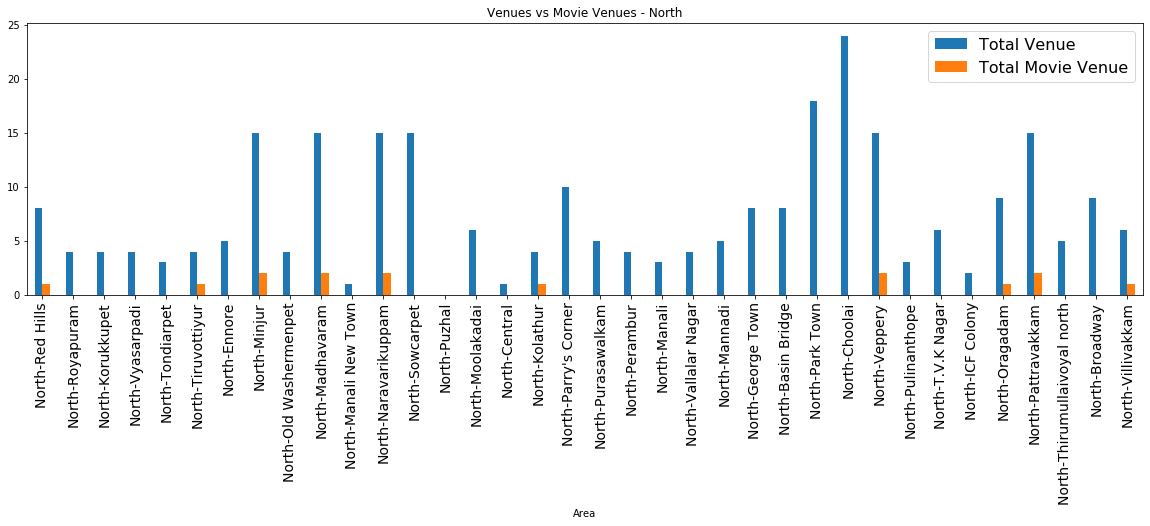

In [146]:
#Plot by Area Wise --North 
final_df[final_df['Borough'] == 'North'].plot.bar(x= 'Area', y = ['Total Venue','Total Movie Venue'],figsize=(20,5))
plt.pyplot.legend(loc = 'best', fontsize = 16)
plt.pyplot.xticks(size =14)
plt.pyplot.title('Venues vs Movie Venues - North')
plt.pyplot.show()

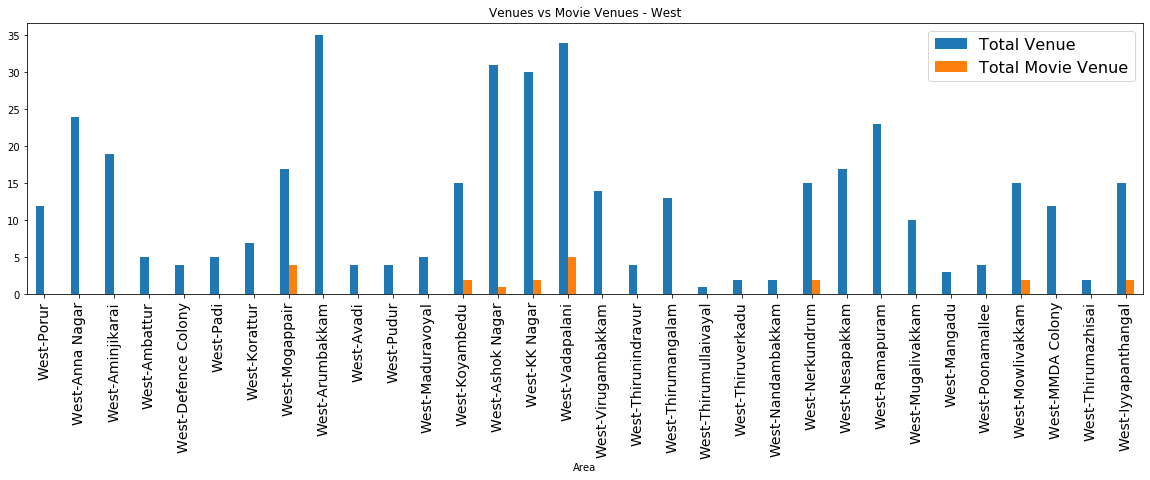

In [147]:
#Plot by Area Wise --West 
final_df[final_df['Borough'] == 'West'].plot.bar(x= 'Area', y = ['Total Venue','Total Movie Venue'],figsize=(20,5))
plt.pyplot.legend(loc = 'best', fontsize = 16)
plt.pyplot.xticks(size =14)
plt.pyplot.title('Venues vs Movie Venues - West')
plt.pyplot.show()

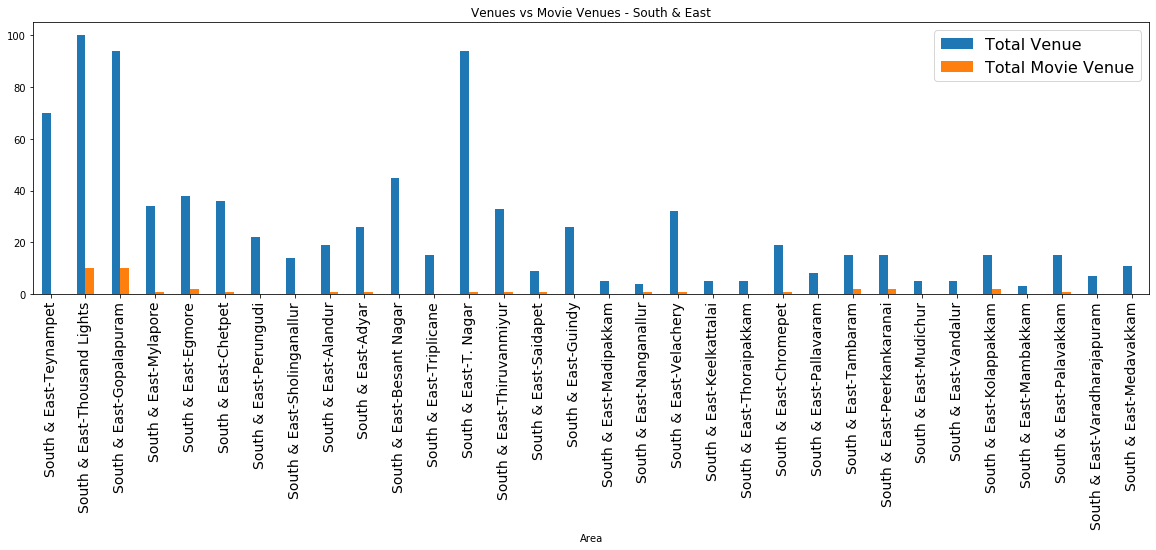

In [148]:
#Plot by Area Wise --South and East 
final_df[final_df['Borough'] == 'South & East'].plot.bar(x= 'Area', y = ['Total Venue','Total Movie Venue'],figsize=(20,5))
plt.pyplot.legend(loc = 'best', fontsize = 16)
plt.pyplot.xticks(size =14)
plt.pyplot.title('Venues vs Movie Venues - South & East')
plt.pyplot.show()

**From the above dataset and graphs we can come to conclusion that in the Suuth & east side the theatres are fairly distributed across each area. From he graphs we can see that even though we had a fair share of venues to look at, The West and North had only a very few theatres. So according to the data scarped we can find that for a new theatre the ideal places must be West or North as they have very few theaters.**

In [23]:
#Exported final dataframe to csv. Incase of errors to reload.
#final_df.to_csv('C:\\users\prath\Final_DataFrame.csv')

## Cluster Analysis of the Neighborhood

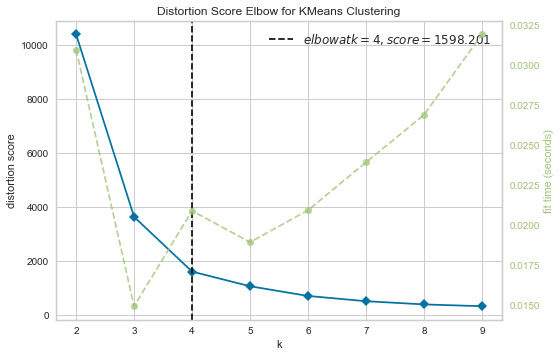

C:\Users\prath\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002224D085248>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [32]:
# Use the quick method and immediately show the figure
to_clustering = final_df.drop(["Neighborhood", "Borough", "Area"], 1)

to_clustering.fillna(0, inplace = True)
kelbow_visualizer(KMeans(random_state=4), to_clustering, k=(2,10))

**As per the above code it is analysed that the optimum valuue of k is 4, So we will fit our model with k=4**

In [33]:

# set number of clusters
toclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=4).fit(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

In [34]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
final_cluster = final_df.copy()

# add clustering labels
final_cluster["Cluster Labels"] = kmeans.labels_

In [35]:
final_cluster.head()

,Borough,Neighborhood,Latitude,Longitude,Total Venue,Total Movie Venue,Area,Cluster Labels
0,North,Red Hills,13.10862,80.20615,8.0,1.0,North-Red Hills,2
1,North,Royapuram,13.10728,80.29295,4.0,NaN,North-Royapuram,2
2,North,Korukkupet,13.11805,80.27774,4.0,NaN,North-Korukkupet,2
3,North,Vyasarpadi,13.11911,80.25750,4.0,NaN,North-Vyasarpadi,2
4,North,Tondiarpet,13.13145,80.27997,3.0,NaN,North-Tondiarpet,2


### Visualize the Cluster

In [36]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [51]:
# create map
cl_colors=[0]*4
for i in range(0,4):
    cl_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
map_clusters = folium.Map(location=[chn_latitude,chn_longitude],zoom_start=12,control_scale=True)

for lat,lng,boro,nei in zip(final_cluster['Latitude'], final_cluster['Longitude'],
                            final_cluster['Neighborhood'], final_cluster['Cluster Labels']):
    #print(boro)
    label_text = str(boro) + ' - ' + str(nei)
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=cl_colors[nei],
    fill=True,
    fill_color = cl_colors[nei],
    fill_opacity=0.7).add_to(map_clusters)

In [52]:
map_clusters

In [53]:
final_cluster.groupby(['Cluster Labels'])['Total Movie Venue'].agg('sum')

Cluster Labels
0    31.0
1    21.0
2     7.0
3    15.0
Name: Total Movie Venue, dtype: float64

## Observation and Conclusion
As per the cluster mapping, we can come to the conclusion that the cluster- 2 which is predominantly present in the North side of the map and some portions on the West side of the map have very low number of theatres. So we have to concentrate on those coordinates of the map in order for the theater to have less competition and attract more audiences.